<h1>Histograma</h1>

É um conjunto de números que indica a **quantidade** ou o **percentual** de pixels que apresentam determinado nível de cinza.

São normalmente apresentados por um gráfico que fornece para cada nível de cinza a quantidade (ou o percentual) de pixels com aquele nível de cinza na imagem.

Através da análise do histograma de uma imagem é possível obter uma indicação de sua qualidade quanto ao nível de contraste e quanto ao seu brilho médio (se a imagem é predominantemente clara ou escura).

In [2]:
# importa os pacotes
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

1) Escreva uma função para calcular e retornar o histograma de uma imagem monocromática na forma de um array de 256 posições.

In [3]:
def makeHist(img):
    hist = np.zeros(256)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            hist[img[i,j]] += 1
    return hist / img.size

img1 = cv2.imread('2_7.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('4_2.png', cv2.IMREAD_GRAYSCALE)

hist1 = makeHist(img1)
hist2 = makeHist(img2)




2) Plote os histogramas das imagens 4_2.png e 2_7.png.

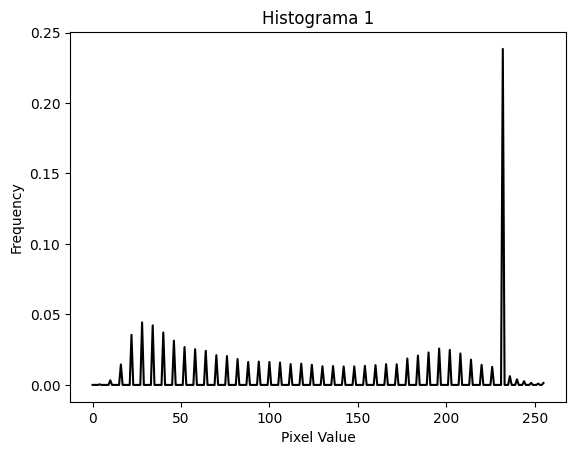

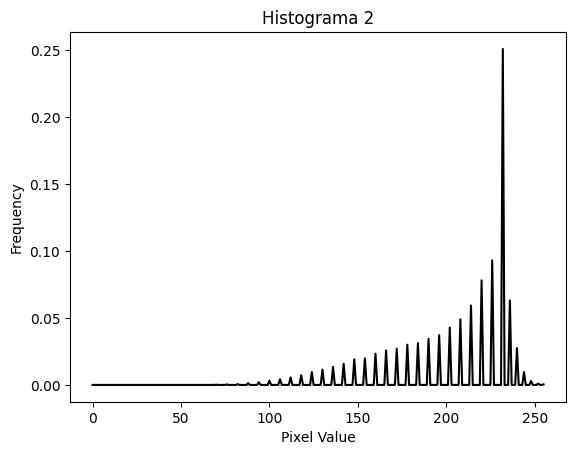

In [4]:
plt.plot(hist1, color='black')
plt.title("Histograma 1")
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

plt.plot(hist2, color='black')
plt.title("Histograma 2")
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

# Transformações de intensidade

Descrevem regras para atribuição de novos valores de intensidade de pixel baseando-se exclusivamente no seu valor de intensidade atual.

As transformações podem ser lineares e não-lineares.

Transformações lineares podem ser expressas da seguinte forma:

$y_{ij} = a \cdot x_{ij} + b$

Onde:
*   $x_{ij}$: valor de intensidade do pixel atual na posição $ij$
*   $y_{ij}$: novo valor de intensidade do pixel na posição $ij$

3) Descreva e implemente uma função de transformação de intensidade a fim de tornar a imagem da figura **4_2.png** mais escura.

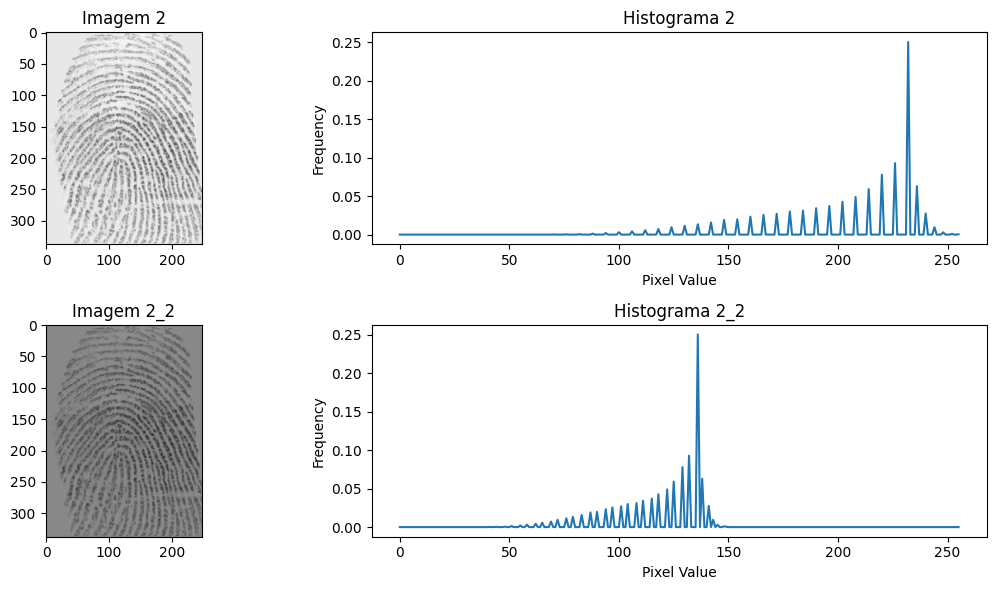

In [5]:
def contrast(img, a, b):
    imgb = img.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            imgb[i,j] = img[i,j] * a + b
    return imgb

img22 = contrast(img2,  0.5882, 0)

hist22 = makeHist(img22)

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem 2")

plt.subplot(2, 2, 3)
plt.imshow(img22, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem 2_2")

plt.subplot(2, 2, 2)
plt.plot(np.arange(256), hist2)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title("Histograma 2")

plt.subplot(2, 2, 4)
plt.plot(np.arange(256), hist22)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title("Histograma 2_2")

plt.tight_layout()
plt.show()

4) Descreva e implemente uma função de transformação de intensidade a fim de tornar a imagem da figura **2_7.png** mais clara.

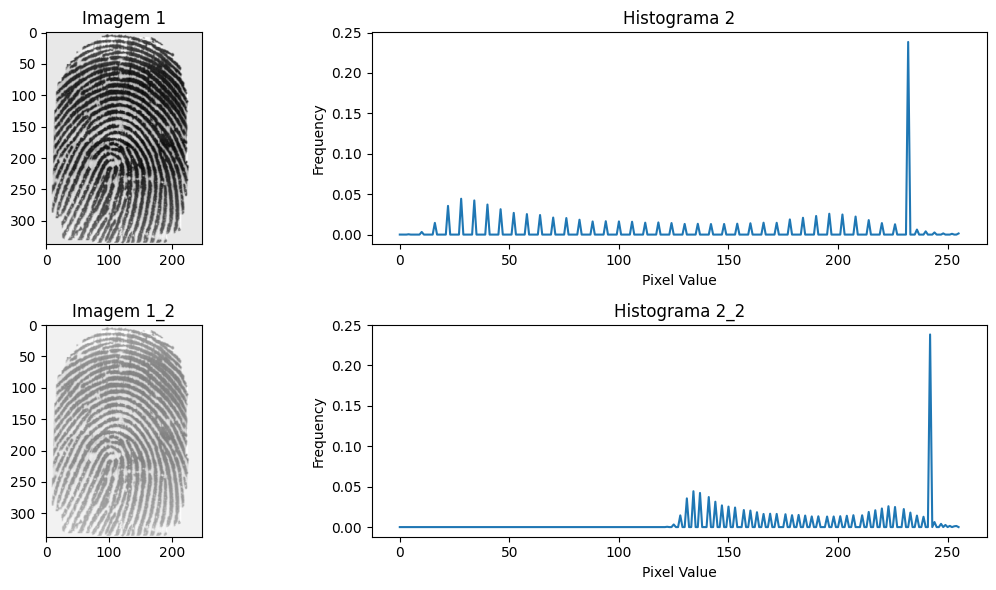

In [6]:
img12 = contrast(img1, 0.5294, 120)
hist12 = makeHist(img12)
        
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem 1")

plt.subplot(2, 2, 3)
plt.imshow(img12, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem 1_2")

plt.subplot(2, 2, 2)
plt.plot(np.arange(256), hist1)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title("Histograma 2")

plt.subplot(2, 2, 4)
plt.plot(np.arange(256), hist12)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title("Histograma 2_2")

plt.tight_layout()
plt.show()

# Equalização do Histograma

É uma técnica que visa redistribuir os valores de tons de cinza dos pixels em uma imagem, de modo a obter um histograma uniforme, no qual o número (ou percentual) de pixels de qualquer nível de cinza seja praticamente o mesmo.

A forma mais usual de se equalizar um histograma é utilizar a Função de Distribuição Acumulada (CDF, *Cumulative Distribution Function*) da distribuição de probabilidades original.

5) Calcular e plotar a função CDF do histograma da imagem da figura **4_2.png**.

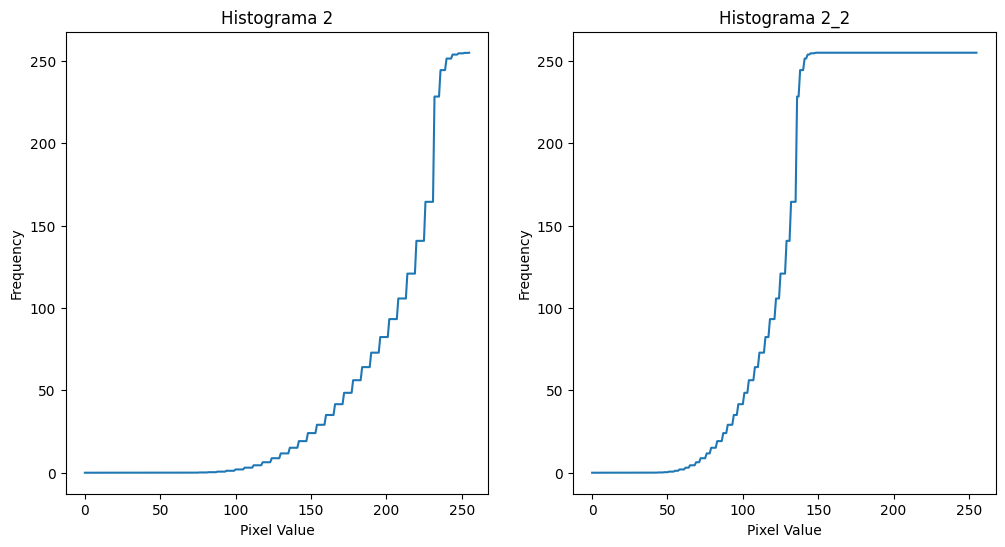

In [7]:
def cdf(hist):
    return np.cumsum(hist) * 255

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.arange(256), cdf(hist2))
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title("Histograma 2")

plt.subplot(1, 2, 2)
plt.plot(np.arange(256), cdf(hist22))
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title("Histograma 2_2")

plt.show()

6) Equalizar o histograma da imagem da figura **4_2.png** e plotar os seguinte:


1.   Imagem original
2.   Histograma da imagem original
3.   Imagem processada (equalizada)
4.   Histograma da imagem processada



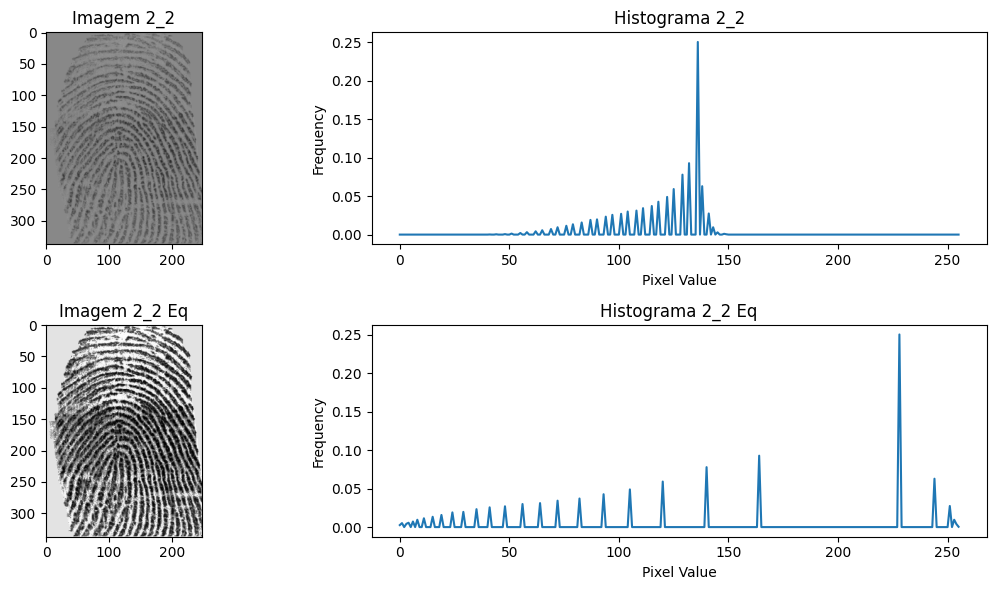

In [8]:
def contrastCdf(img, cdf):
    imgb = img.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            imgb[i,j] = cdf[ imgb[i,j] ]
            
    return imgb

img22Eq = contrastCdf(img22, cdf(hist22))

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(img22, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem 2_2")

plt.subplot(2, 2, 3)
plt.imshow(img22Eq, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem 2_2 Eq")

plt.subplot(2, 2, 2)
plt.plot(np.arange(256), hist22)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title("Histograma 2_2")

plt.subplot(2, 2, 4)
plt.plot(np.arange(256), makeHist(img22Eq))
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title("Histograma 2_2 Eq")

plt.tight_layout()
plt.show()

7) Equalizar o histograma da imagem da figura **2_7.png** e plotar os seguinte:


1.   Imagem original
2.   Histograma da imagem original
3.   Imagem processada (equalizada)
4.   Histograma da imagem processada


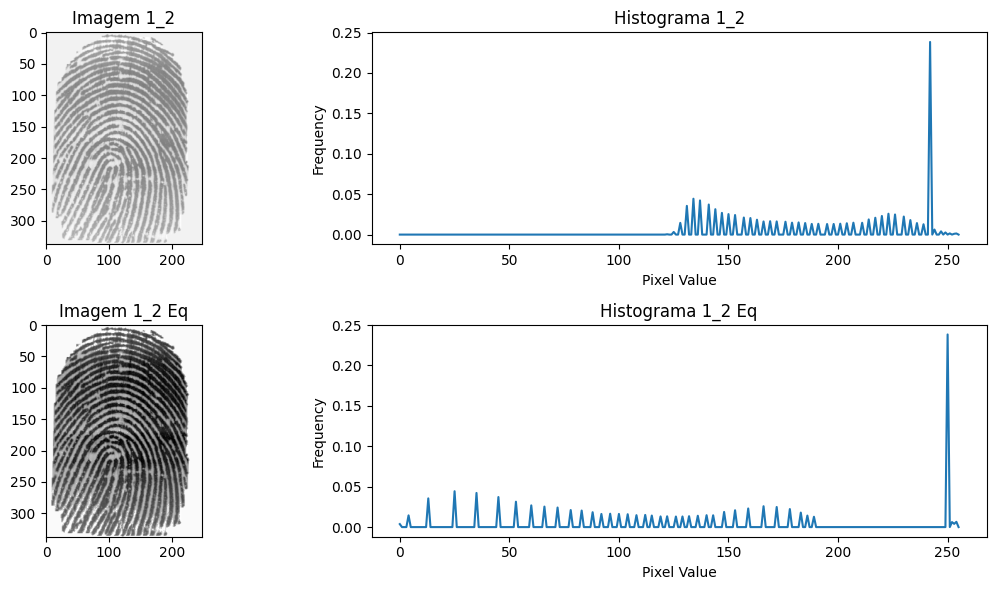

In [9]:
img12Eq = contrastCdf(img12, cdf(hist12))

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(img12, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem 1_2")

plt.subplot(2, 2, 3)
plt.imshow(img12Eq, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem 1_2 Eq")

plt.subplot(2, 2, 2)
plt.plot(np.arange(256), hist12)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title("Histograma 1_2")

plt.subplot(2, 2, 4)
plt.plot(np.arange(256), makeHist(img12Eq))
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title("Histograma 1_2 Eq")

plt.tight_layout()
plt.show()


---

<h1>Equipe</h1>

**Aluno 1**: Fabricio Bertoncello Filho (26648849)

**Aluno 2**: Bruno Dalagnol (25766201)

**Aluno 3**: Lucas Guimarães Moreira (26681307)

**Aluno 4**: Renato Leal de Araujo (26723573)
